## Introduction To SciKit-Learn 

1.scikit-learn Work Flow

work-flow
1.getting data ready
2.choose. the right algorithm for our problems
3.Fit the model/algorithm and use it to make predictions on our data
4.Evaluating a model
5.Improve a model
6.save and load a trained model
7. putting it all together
 

In [1]:
#Get Data Ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("../datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Create x - Features Matrix
x = heart_disease.drop("target", axis=1)

#Create y  (labels):
y = heart_disease["target"]

In [3]:
#2. Choose the right Model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) 

clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3 fit the model to the training data

from sklearn.model_selection import train_test_split   
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)


In [5]:
clf.fit(x_train , y_train);

In [6]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2


In [7]:
y_train.head()

147    1
151    1
53     1
185    0
182    0
Name: target, dtype: int64

In [8]:
#Make a Prediction
y_preds = clf.predict(x_test)

In [9]:
y_preds

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [10]:
# 4. Evaluate the Model 
#Accuracy for Training Data
clf.score(x_train , y_train)  

1.0

In [11]:
#Test Data
clf.score(x_test , y_test)

0.8524590163934426

In [12]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.89      0.86      0.88        37

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[20,  4],
       [ 5, 32]])

In [14]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [15]:
# 5. Improve the Model 
#Try different amount n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying Model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    print(f"Model Accuracy on test set: {clf.score(x_test, y_test)*100:.2f}%")
    print(" ")

Trying Model with 10 estimators...
Model Accuracy on test set: 80.33%
 
Trying Model with 20 estimators...
Model Accuracy on test set: 80.33%
 
Trying Model with 30 estimators...
Model Accuracy on test set: 80.33%
 
Trying Model with 40 estimators...
Model Accuracy on test set: 90.16%
 
Trying Model with 50 estimators...
Model Accuracy on test set: 90.16%
 
Trying Model with 60 estimators...
Model Accuracy on test set: 85.25%
 
Trying Model with 70 estimators...
Model Accuracy on test set: 90.16%
 
Trying Model with 80 estimators...
Model Accuracy on test set: 88.52%
 
Trying Model with 90 estimators...
Model Accuracy on test set: 90.16%
 


In [16]:
# We found highest accuracy at estimators = 80  
# We Update our model with the new estimator
clf = RandomForestClassifier(n_estimators=80)
clf.fit(x_train , y_train);
clf.score(x_test, y_test)

0.8524590163934426

In [17]:
# 6. Save the Model and Load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
# Import Loaded Model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"));
loaded_model.score(x_test, y_test)

0.8524590163934426

## 1. Getting our Data Ready to be used 
Three main things we have to do:
    1.Split the data into features and labels (usually `x` and `y`)
    2.Filling (also called imputing ) or disregarding missing values
    3.Converting non numerical values to numerical values (also called Feature Coding)
    

In [19]:
#1.1 Make sure all data is numerical
car_sales = pd.read_csv("../datasets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
len(car_sales) # returns number of rows of data

1000

In [21]:
#step 1: split the data to x and y 
X = car_sales.drop("Price", axis=1)
Y= car_sales["Price"]

#split into training set
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2)


In [22]:
#We need to convert all the values to numeric values
#Turn the catergories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] 
#Doors is numeric but it can be classified into different categories like 4 doors , 3 doors , 5 doors
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X



array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [23]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [24]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [25]:
np.random.seed(42)
X_train , X_test , Y_train , Y_test  =train_test_split(transformed_X, Y, test_size = 0.2) #New X


In [26]:
#Build Model
from sklearn.ensemble import RandomForestRegressor #It can predict number
model = RandomForestRegressor(n_estimators=80)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


0.3093435017735806

1.2 Dealing with Missing Values 
    1.Fill the missing values (imputation)
    2. Remove the missing data altogether
    

In [27]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [28]:
car_sales_missing.tail(10)

,Make,Colour,Odometer (KM),Doors,Price
990,Toyota,White,173408.0,4.0,8082.0
991,Honda,Blue,235985.0,4.0,9184.0
992,Honda,Green,54721.0,4.0,27419.0
993,Nissan,Black,162523.0,4.0,4696.0
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [29]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
#Split to x and y
x  = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]



In [31]:
#Lets convert the values to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)], 
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(x)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### option1. Fill Missing Data with Pandas


In [32]:
#Fill the missing Columns
car_sales_missing.fillna({"Make":"missing",
                          "Colour":"missing",
                          "Odometer (KM)":"missing",
                          "Doors":4,
                          }, inplace=True)



In [33]:
car_sales_missing.isna().sum() #We can observe that there are no more NaN values in Make , Colour and Doors Columns

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
#To remove Missing values from Price Column we will drop the rows with missing Values
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
#Now we have filled or removed all the missing values

In [37]:
car_sales_missing #We can see that NaN values are replaced by missing or 4(Doors Column)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)], 
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


## Option 2 Fill the Missing Data with sklearn

In [40]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
#Drop Rows with Missing Values in Price Column
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
#Split into x and y
X  =  car_sales_missing.drop("Price", axis =1)
Y = car_sales_missing["Price"]

In [44]:
#Fill missing values using sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose  import ColumnTransformer

#Fill categorical values with missing and numerical values with mean

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Column_features
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Define Imputer (Something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer,cat_features),
                            ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)
                             ])
#Transfrom the data
filled_X = imputer.fit_transform(X)
filled_X
pd.DataFrame(filled_X)
#We can Observe that all the missing values are filled based on the conditions


,0,1,2,3
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [45]:
pd.DataFrame(filled_X).isna().sum() #No Missing values

0    0
1    0
2    0
3    0
dtype: int64

In [46]:
car_sales_filled = pd.DataFrame(filled_X, columns =["Make", "Colour", "Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [47]:
car_sales_filled.head(20)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
5,Honda,Red,4.0,42652.0
6,Toyota,Blue,4.0,163453.0
7,Honda,White,4.0,130987.447894
8,missing,White,4.0,130538.0
9,Honda,Blue,4.0,51029.0


In [48]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)], 
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [50]:
#Now we have got our data as numbers and filled 
#Lets fit a model
np.random.seed(9)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(transformed_X, Y, test_size=(0.2))

model = RandomForestRegressor(n_estimators=80)
model.fit(X_train , Y_train)
model.score(X_test, Y_test)


0.042836844493988946

In [51]:
len(car_sales_filled) , len(car_sales) #Low Accuracy is due to less data 

(950, 1000)

## 2. Choosing the right Estimator/Algorithm 
Sklearn uses estimator as another term for machine Learning model or algorithm
    
    1.Classification - Predicting whether a sample is one thing or another
    2.Regression - Predicting a Number

use sklearn ml map to find the right estimator 

### 2.1 Picking Machine Learning Model for a Regression Problem

In [52]:
#Loading california_housing dataset for regressing 
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california;


In [53]:
california_df = pd.DataFrame(california["data"] , columns=california["feature_names"])
california_df["target"] = pd.Series(california["target"])
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
len(california_df)

20640

In [55]:
# Working with  ridge regression Model
#Ref sklearn machine learning map to find the right model...
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#Create the data (split the data into x and y)
X = california_df.drop("target",axis=1)
Y = california_df["target"]

#Split to train and test set

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2)

#Initiate the Model

model = Ridge()
model.fit(X_train , Y_train)
model.score(X_test, Y_test)

0.5758549611440127

In [56]:
# How to improve the model
#Using Ensemble method RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Setup Seed so that data can be reproduced
np.random.seed(42)
#Create the data
X= california_df.drop("target", axis=1)
Y = california_df["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=80)
model_rf.fit(X_train , Y_train)
model_rf.score(X_test, Y_test)



0.8062702737063999

In [57]:
model.score(X_test, Y_test) #We can clearly see that RandomForestRegressor model is 
#performing better than Ridge hence we should got with RandomForestRegressor model in this case

0.5758549611440127

In [58]:
## 2.2 Choosing an estimator for classification problem
#Go to the map


In [59]:
heart_disease = pd.read_csv("../datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
#For classification Problems
#SkLearn ML map suggest to use LinearSVC  model

from sklearn.svm import LinearSVC
#setup randomseed to reproduce the data
np.random.seed(42)

#Setup Data X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#split the data
X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2)

#Initiate  LinearSVC
clf = LinearSVC()
clf.fit(X_train , Y_train)

clf.score(X_test, Y_test)



0.8688524590163934

In [61]:

heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [62]:
#InCase the Model had not worked:
#We will try another model
#For classification we can also use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=80)
clf2.fit(X_train, Y_train)
clf2.score(X_test, Y_test)

0.8524590163934426

## 3.Fit the Model/Algorithm on our Data use it to make Predictions
3.1 - <--Fit the Data-->

<-Differrent Names->
##
    X = Features , Feature_Variable , Data
    Y = Labels , Targets , Target_variables

In [63]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X= heart_disease.drop("target" ,axis=1)
Y = heart_disease["target"]

X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=80)

#<---Fit the Data--->
clf.fit(X_train , Y_train) #Finds patterns in data and Trains the ML model
clf.score(X_test , Y_test) 



0.8524590163934426

# 3.2 Make Predictions Using Machine Learning Models

 Use a Trained Model to make Predictions

#There are 2 ways:

1.predict()

2.predict_proba()


In [64]:
print(X_test.shape)
y_preds = clf.predict(X_test) 
np.mean(y_preds==Y_test)

(61, 13)


np.float64(0.8524590163934426)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test  , y_preds) 

0.8524590163934426

Make Predictions using `predict_proba()`


In [66]:
clf.predict_proba(X_test[:5]) #returns probabilities of a classification label
#Here the value at index[i][1] is greater when true and smaller when false

array([[0.9   , 0.1   ],
       [0.475 , 0.525 ],
       [0.425 , 0.575 ],
       [0.8375, 0.1625],
       [0.1625, 0.8375]])

In [67]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
# predict() can also be used for regression models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_df.drop("target", axis=1)
Y = california_df["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, Y_train)
model.score(X_test, Y_test)


#Make Predictions
y_preds= model.predict(X_test)

In [69]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [70]:
np.array(Y_test) #We can see that the values are almost equal.

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [71]:
#Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_preds)

np.float64(0.32659871732073664)

## 4.Evaluating Model

    Three Ways to Evaluated sklearn models
    1. Estimator score method
    2. The scoring parameter
    3. Problem-specific metric functions
    

In [72]:
#!.Using Score Method 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train , Y_train)
clf.score(X_test, Y_test) #Score Method returns mean accuracy of the data or labels

0.8524590163934426

In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_df.drop("target", axis=1)
Y = california_df["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, Y_train);

In [74]:
model.score(X_test, Y_test) #In Regression Models the score Return the coefficient of determination of the prediction.


0.8065734772187598

In [75]:
#2.Evaluating model using scoring parameter
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train , Y_train)
clf.score(X_test, Y_test)


0.8524590163934426

In [76]:
#Using Cross Val Score

cross_val_score(clf, X, Y) #Returns the score for 5 different sets of data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [77]:
#Lets compare the results of score and cross_val_score
np.random.seed(42)
score_val = clf.score(X_test, Y_test)

cross_val_score_res  = np.mean(cross_val_score(clf, X,Y));

#Comparison

score_val , cross_val_score_res



(0.8524590163934426, np.float64(0.8248087431693989))

In [78]:
#scoring parameter is set to none by default

cross_val_score(clf, X , Y , scoring=None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 classification of model evaluation metrics

    1.Accuracy

    2.Area under ROC curve

    3.Confusion Matrix
    
    4.Classification report
    

In [79]:
#1.Accuracy
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2)

accuracy = np.mean(cross_val_score(clf , X, Y , scoring=None))
print(f"Heart Disease Model Accuracy Using cross_val_score is :{accuracy*100:.2f}%")

Heart Disease Model Accuracy Using cross_val_score is :82.15%


## 2.Area under the receiver operating characteristic curve(AUC/ROC)

1.Area under curve (AUC)
2.ROC curve

ROC curves are a comparison of a model's true positive rate(tpr) versus a models false positive rate(fpr)

*True Positive Rate - Model Predicts 1 when Truth Value  is 1
*False Positive Rate - Models Predicts 1 when Truth Value is 0
*True Negative Rate - Model Predict 0 when Truth Value is 0
*False Negative Rate - Model Predict 1 when Truth value is 1



In [82]:
#create train and test data

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2)

#Fit the model

clf = RandomForestClassifier()
clf.fit(X_train , Y_train);


In [87]:
from sklearn.metrics import roc_curve

#Make Predictions with probabilities

y_probs = clf.predict_proba(X_test)
y_probs[:5] ,  len(y_probs)

(array([[0.83, 0.17],
        [0.55, 0.45],
        [0.91, 0.09],
        [0.03, 0.97],
        [0.13, 0.87]]),
 61)

In [88]:
y_probs_positive = y_probs[:, 1] #Probalities of Postive Value i.e 1
y_probs_positive[:5]

array([0.17, 0.45, 0.09, 0.97, 0.87])

In [92]:
#Calculate fpr , tpr and thresholdds

fpr  ,tpr , thresholds = roc_curve(Y_test,y_probs_positive)

#Check False Positive Rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.11538462, 0.11538462, 0.15384615, 0.19230769, 0.19230769,
       0.19230769, 0.23076923, 0.42307692, 0.5       , 0.53846154,
       0.53846154, 0.65384615, 0.65384615, 0.73076923, 0.80769231,
       0.88461538, 0.96153846, 1.        ])

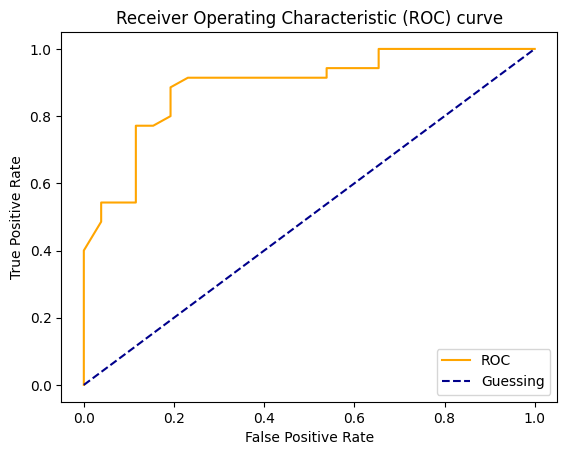

In [93]:
#Create a function for plotting ROC Curve
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    #Plots the curve for fpr and tpr
    #Plot ROC Curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test , y_probs_positive)

np.float64(0.8895604395604395)

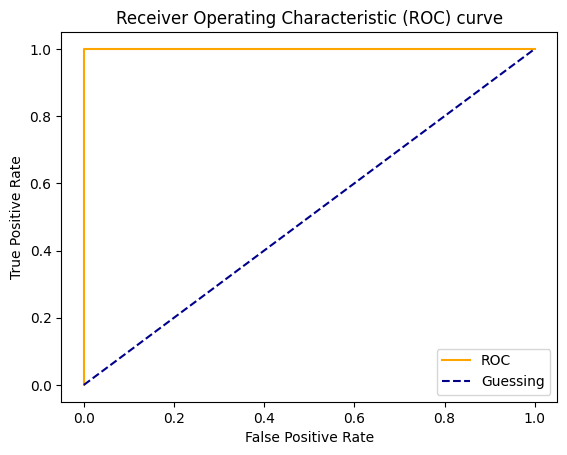

In [96]:
#Plot perfect Roc curve and AUC Score
fpr, tpr , thresholds = roc_curve(Y_test , Y_test)
plot_roc_curve(fpr, tpr)

In [97]:
#Perfect AUC Score
roc_auc_score(Y_test, Y_test) #In real world we don't get perfect AUC(Area Under the Curve) score

np.float64(1.0)

## 3.Confusion Matrix
Its a quick way to compare the labels a model predicts and the actual labels it was supposed to predict 

Giving You an Idea where the model is getting confused


In [100]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test, y_preds)

array([[21,  5],
       [ 7, 28]])

In [101]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(Y_test , y_preds , rownames=["Actual Label"], colnames=["Predicted Labels"])

#We can see from below that there are TNR-21 , FNR-7 ,TPR-28 , FPR-5 
#We can also observe that the true diagonal elements are values that the model predicted correctly
#And the other diagonal is where the model got confused
#Sum of the all the values is same as the len(y_preds)

Predicted Labels,0,1
Actual Label,,
0,21,5
1,7,28


<Axes: >

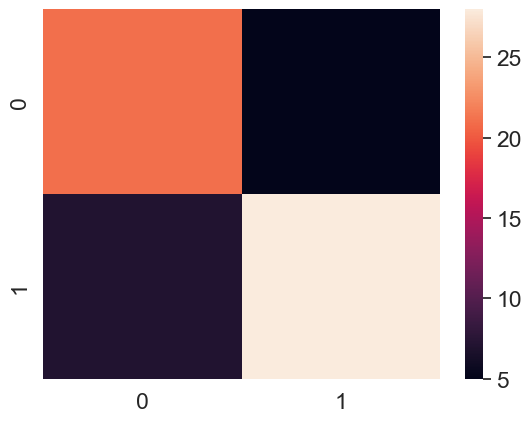

In [120]:
#Make our confusion matrix more with seaborn's heatmap()
import seaborn as sns

#Set the font-scale
sns.set_theme(font_scale=1.5)

#Create a confusion matrix
con_mat  = confusion_matrix(Y_test, y_preds)

#Plot it using SeaBorn
sns.heatmap(con_mat)

In [121]:
def plot_conf_map(con_mat):
    #Plot a confusion matrix using seaborn heatmap()

    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(con_mat ,
                     annot=True , #Annotate the box with conf_mat info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel('Predicted Label')

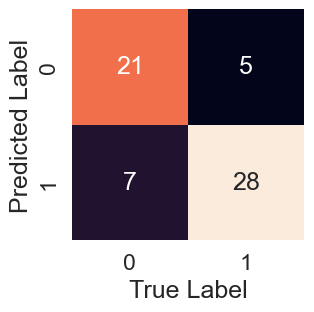

In [122]:
plot_conf_map(con_mat)

## 4.Classification Report

In [123]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_preds))
#check documentation of classification report to find what each parameter indicates 

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.85      0.80      0.82        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

